#Preprocesamiento de datos

In [ ]:
import pickle
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
sns.set_style(style='white')

In [ ]:
!gdown --id 1Mpk-C-msTdfZJK88IiaEHrV4Jez4l0PV #https://drive.google.com/file/d/1Mpk-C-msTdfZJK88IiaEHrV4Jez4l0PV/view?usp=sharing
!unzip ObesityDataSet_raw_and_data_sinthetic.zip

Downloading...
From: https://drive.google.com/uc?id=1Mpk-C-msTdfZJK88IiaEHrV4Jez4l0PV
To: /content/ObesityDataSet_raw_and_data_sinthetic.zip
100% 119k/119k [00:00<00:00, 38.7MB/s]
Archive:  ObesityDataSet_raw_and_data_sinthetic.zip
replace ObesityDataSet_raw_and_data_sinthetic.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ObesityDataSet_raw_and_data_sinthetic.arff  
  inflating: ObesityDataSet_raw_and_data_sinthetic.csv  


In [ ]:
data=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [ ]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
data["CAEC"].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

In [ ]:
data["CALC"].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [ ]:
data["MTRANS"].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [ ]:
data["NObeyesdad"].value_counts()/len(data)*100

Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: NObeyesdad, dtype: float64

In [ ]:
numeric=["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
ordinal=["CAEC","CALC"]
flags=["family_history_with_overweight","FAVC","SMOKE","SCC"]
categorical=["MTRANS","Gender"]

In [ ]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
data["CAEC"]=data["CAEC"].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})

In [ ]:
data["CALC"]=data["CALC"].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})

In [ ]:
#data["Gender"]=data["Gender"].map({"Female":0,"Male":1})

In [ ]:
#Se usa la función get_dummies para codificar en one hot encoding los datos categóricos ("MTRANS" y "Gender") y el drop_first para no tener columnas altamente correlacionadas
data = pd.get_dummies(data, columns=categorical, drop_first=True)
data.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male
0,21.0,1.62,64.0,yes,no,2.0,3.0,1,no,2.0,no,0.0,1.0,0,Normal_Weight,0,0,1,0,0
1,21.0,1.52,56.0,yes,no,3.0,3.0,1,yes,3.0,yes,3.0,0.0,1,Normal_Weight,0,0,1,0,0
2,23.0,1.80,77.0,yes,no,2.0,3.0,1,no,2.0,no,2.0,1.0,2,Normal_Weight,0,0,1,0,1
3,27.0,1.80,87.0,no,no,3.0,3.0,1,no,2.0,no,2.0,0.0,2,Overweight_Level_I,0,0,0,1,1
4,22.0,1.78,89.8,no,no,2.0,1.0,1,no,2.0,no,0.0,0.0,1,Overweight_Level_II,0,0,1,0,1


In [ ]:
len(numeric+ordinal+flags+categorical)

16

In [ ]:
len(data.columns)

20

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

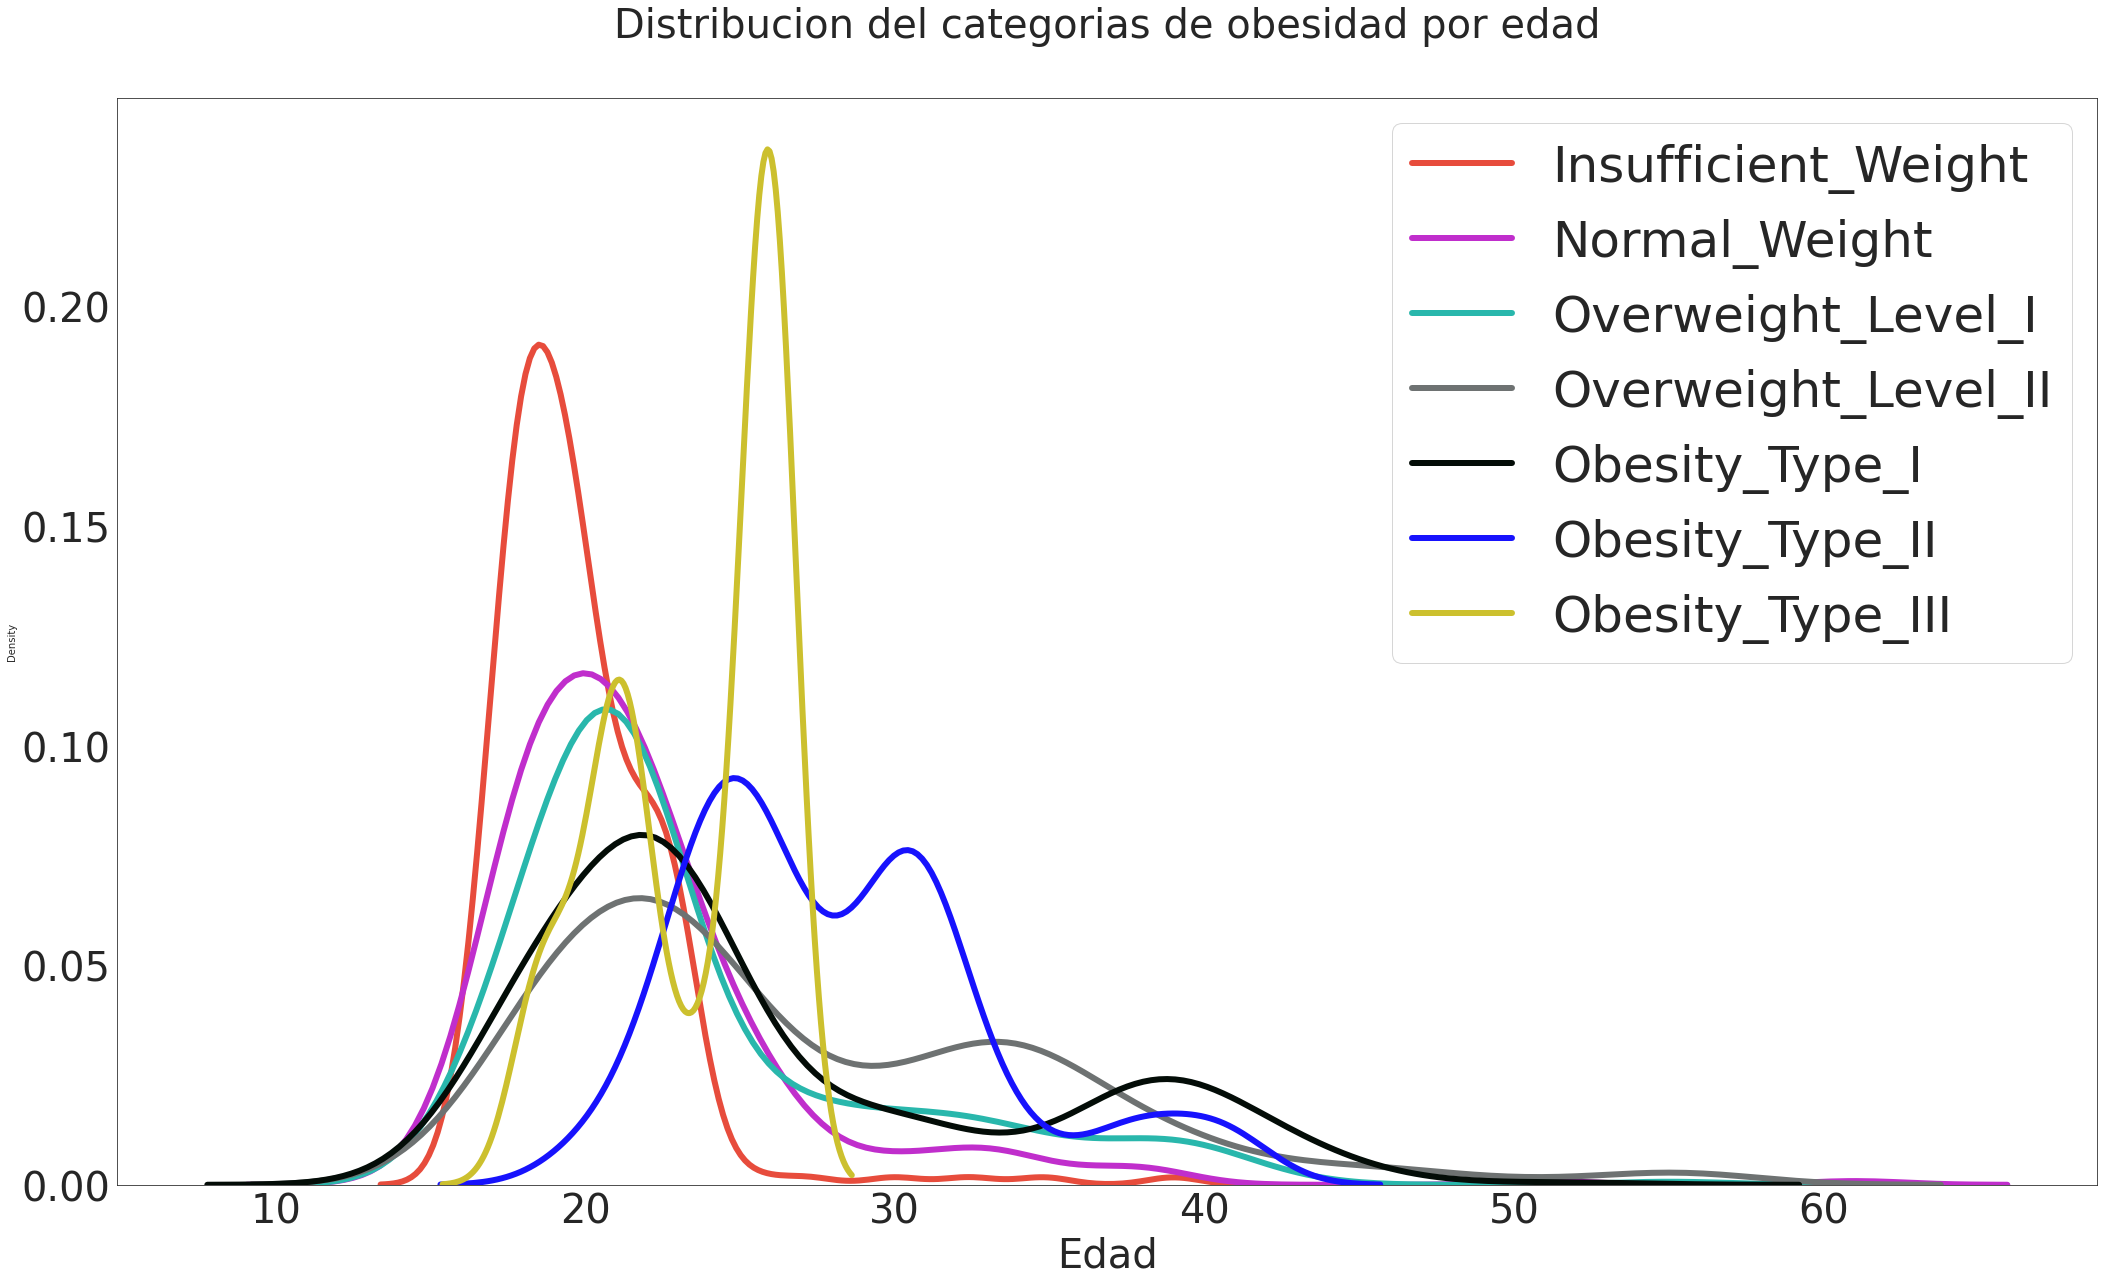

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

# Distribution of feature in dataset
#sns.distplot(dataset["Edad"], label='Distribucion de edad', hist=False, color='#e74c3c', ax=axs)
sns.distplot(data[data["NObeyesdad"]=="Insufficient_Weight"]["Age"], label='Insufficient_Weight', hist=False, color='#e74c3c', ax=axs,kde_kws=dict(linewidth=6))
sns.distplot(data[data["NObeyesdad"]=="Normal_Weight"]["Age"], label='Normal_Weight', hist=False, color='#c02ecc', ax=axs,kde_kws=dict(linewidth=6))
sns.distplot(data[data["NObeyesdad"]=="Overweight_Level_I"]["Age"], label='Overweight_Level_I', hist=False, color='#29b7ac', ax=axs,kde_kws=dict(linewidth=6))
sns.distplot(data[data["NObeyesdad"]=="Overweight_Level_II"]["Age"], label='Overweight_Level_II', hist=False, color='#6e7272', ax=axs,kde_kws=dict(linewidth=6))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_I"]["Age"], label='Obesity_Type_I', hist=False, color='#030c07', ax=axs,kde_kws=dict(linewidth=6))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_II"]["Age"], label='Obesity_Type_II', hist=False, color='#1712fd', ax=axs,kde_kws=dict(linewidth=6))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_III"]["Age"], label='Obesity_Type_III', hist=False, color='#ccc02e', ax=axs,kde_kws=dict(linewidth=6))


axs.tick_params(axis='x', labelsize=40)
axs.tick_params(axis='y', labelsize=40)
axs.set_xlabel('Edad', fontsize=40)
axs.legend(loc='upper right', prop={'size': 50})
axs.set_title('Distribucion del categorias de obesidad por {}'.format("edad"), size=40, y=1.05)
    
plt.show()

In [ ]:
for column in flags:
    data[column]=data[column].map({"yes":1,"no":0})

In [ ]:
data.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male
0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Normal_Weight,0,0,1,0,0
1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Normal_Weight,0,0,1,0,0
2,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Normal_Weight,0,0,1,0,1
3,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Overweight_Level_I,0,0,0,1,1
4,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Overweight_Level_II,0,0,1,0,1


In [ ]:
data["NObeyesdad"].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [ ]:
data["NObeyesdad_num"]=data["NObeyesdad"].map({"Insufficient_Weight":0,"Normal_Weight":1,"Overweight_Level_I":2,
                                           "Overweight_Level_II":3,"Obesity_Type_I":4,"Obesity_Type_II":5,
                                           "Obesity_Type_III":6})

In [ ]:
data["BMI"]=data["Weight"]/(data["Height"]*data["Height"])

In [ ]:
continuous_features_train=data[['Age', 'Height', 'Weight','BMI', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'NObeyesdad_num',
       'MTRANS_Bike',	'MTRANS_Motorbike',	'MTRANS_Public_Transportation',	'MTRANS_Walking',	'Gender_Male']]

In [ ]:
correlation_train=continuous_features_train.corr()

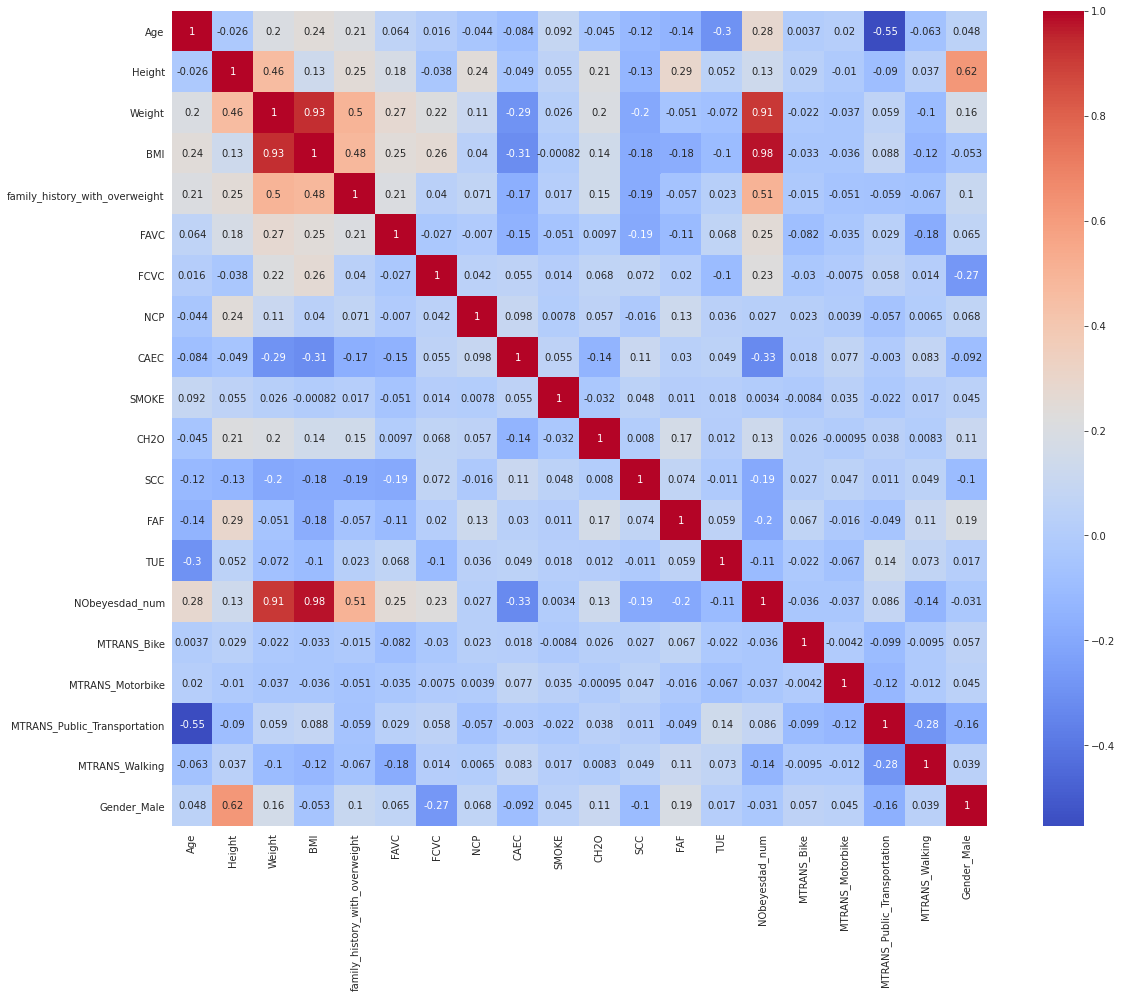

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_train, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})

In [ ]:
correlation_train["abs_NObeyesdad_num"]=abs(correlation_train["NObeyesdad_num"])

In [ ]:
correlation_train.sort_values(by=["abs_NObeyesdad_num"],ascending=False).head(10).reset_index()

,index,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,NObeyesdad_num,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,abs_NObeyesdad_num
0,NObeyesdad_num,0.282913,0.133565,0.913251,0.977826,0.505148,0.247793,0.227759,0.026690,-0.329350,0.003442,0.133008,-0.194508,-0.199901,-0.107991,1.000000,-0.036479,-0.037247,0.085606,-0.138564,-0.031464,1.000000
1,BMI,0.244163,0.131785,0.934806,1.000000,0.483508,0.246097,0.263651,0.039969,-0.313278,-0.000819,0.144200,-0.184286,-0.177537,-0.099720,0.977826,-0.032631,-0.035581,0.088204,-0.124445,-0.053035,0.977826
2,Weight,0.202560,0.463136,1.000000,0.934806,0.496820,0.272300,0.216125,0.107469,-0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.913251,-0.021745,-0.037300,0.059332,-0.100805,0.161668,0.913251
3,family_history_with_overweight,0.205725,0.247684,0.496820,0.483508,1.000000,0.208036,0.040372,0.071370,-0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,0.505148,-0.015435,-0.051011,-0.058927,-0.067076,0.102512,0.505148
4,CAEC,-0.083739,-0.048818,-0.287493,-0.313278,-0.169787,-0.150068,0.054670,0.097801,1.000000,0.055282,-0.144995,0.109179,0.030110,0.048567,-0.329350,0.017857,0.076583,-0.003013,0.082571,-0.091543,0.329350
5,Age,1.000000,-0.025958,0.202560,0.244163,0.205725,0.063902,0.016291,-0.043944,-0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.282913,0.003652,0.020286,-0.554448,-0.063064,0.048394,0.282913
6,FAVC,0.063902,0.178364,0.272300,0.246097,0.208036,1.000000,-0.027283,-0.007000,-0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.247793,-0.082005,-0.035401,0.028539,-0.179473,0.064934,0.247793
7,FCVC,0.016291,-0.038121,0.216125,0.263651,0.040372,-0.027283,1.000000,0.042216,0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,0.227759,-0.029843,-0.007512,0.057966,0.013991,-0.274505,0.227759
8,FAF,-0.144938,0.294709,-0.051436,-0.177537,-0.056673,-0.107995,0.019939,0.129504,0.030110,0.011216,0.167236,0.074221,1.000000,0.058562,-0.199901,0.067129,-0.016351,-0.048751,0.108927,0.189607,0.199901
9,SCC,-0.116283,-0.133753,-0.201906,-0.184286,-0.185422,-0.190658,0.071852,-0.015624,0.109179,0.047731,0.008036,1.000000,0.074221,-0.010928,-0.194508,0.026960,0.047362,0.011255,0.048860,-0.102633,0.194508


In [ ]:
list(correlation_train.sort_values(by=["abs_NObeyesdad_num"],ascending=False).head(10).reset_index()["index"])

['NObeyesdad_num',
 'BMI',
 'Weight',
 'family_history_with_overweight',
 'CAEC',
 'Age',
 'FAVC',
 'FCVC',
 'FAF',
 'SCC']

In [ ]:
continuous_features_train=data[[
 'BMI',
 'Weight',
 'family_history_with_overweight',
 'CAEC',
 'Age',
 'NObeyesdad_num']]
correlation_train=continuous_features_train.corr()

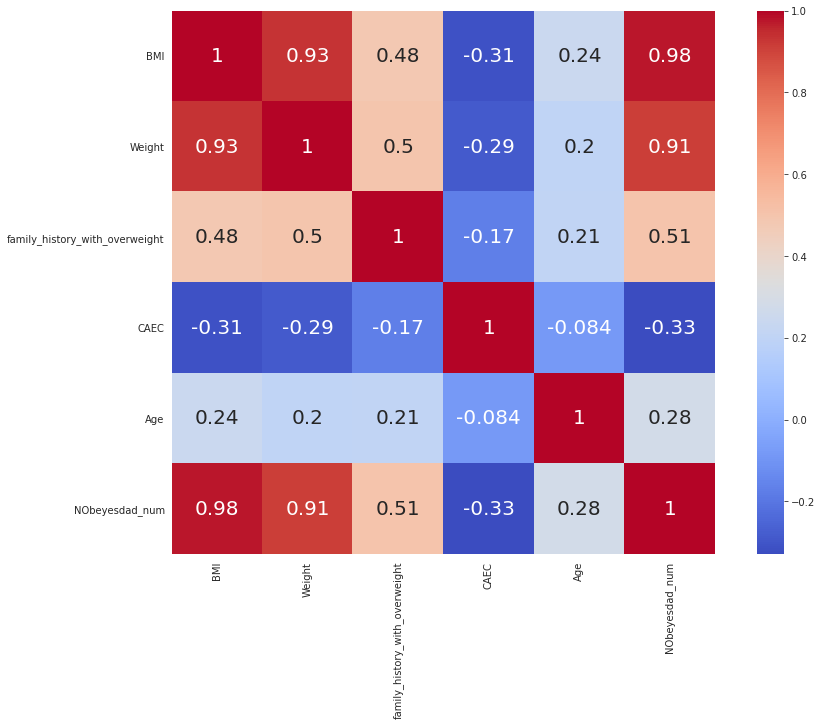

In [ ]:
plt.subplots(figsize=(15,10))
#sns.set(font_scale=1.5)
sns.heatmap(correlation_train, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 20})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


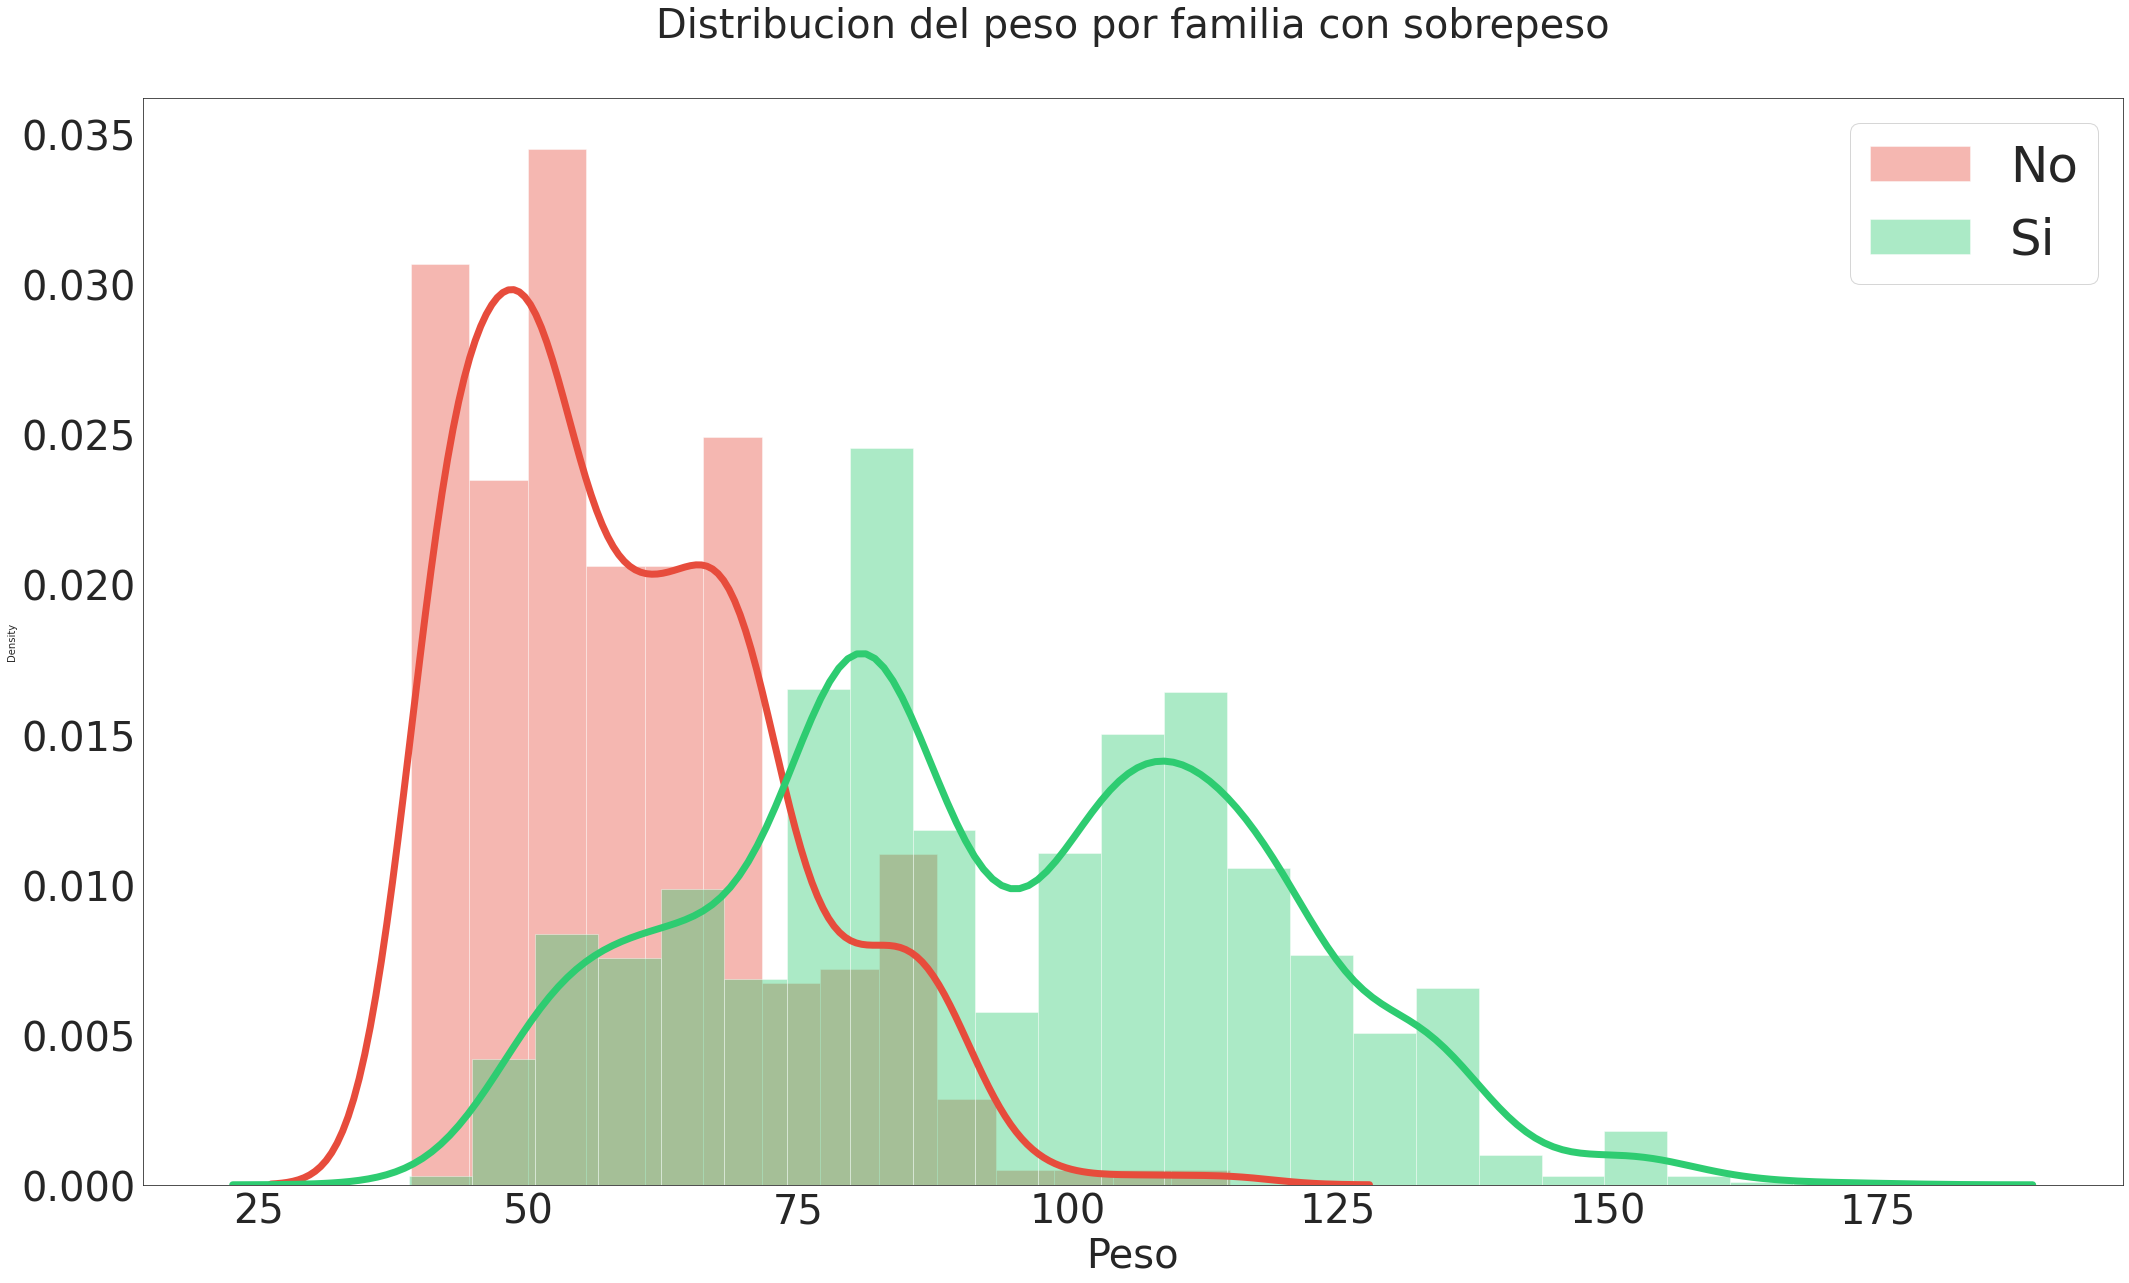

In [ ]:
credit = data['family_history_with_overweight'] == 1
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

# Distribution of feature in dataset
#sns.distplot(dataset["Edad"], label='Distribucion de edad', hist=False, color='#e74c3c', ax=axs)
sns.distplot(data[~credit]["Weight"], label='No', hist=True, color='#e74c3c', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[credit]["Weight"], label='Si', hist=True, color='#2ecc71', ax=axs,kde_kws=dict(linewidth=7))
    
axs.tick_params(axis='x', labelsize=40)
axs.tick_params(axis='y', labelsize=40)
axs.set_xlabel('Peso', fontsize=40)
axs.legend(loc='upper right', prop={'size': 50})
axs.set_title('Distribucion del peso por {}'.format("familia con sobrepeso"), size=40, y=1.05)
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


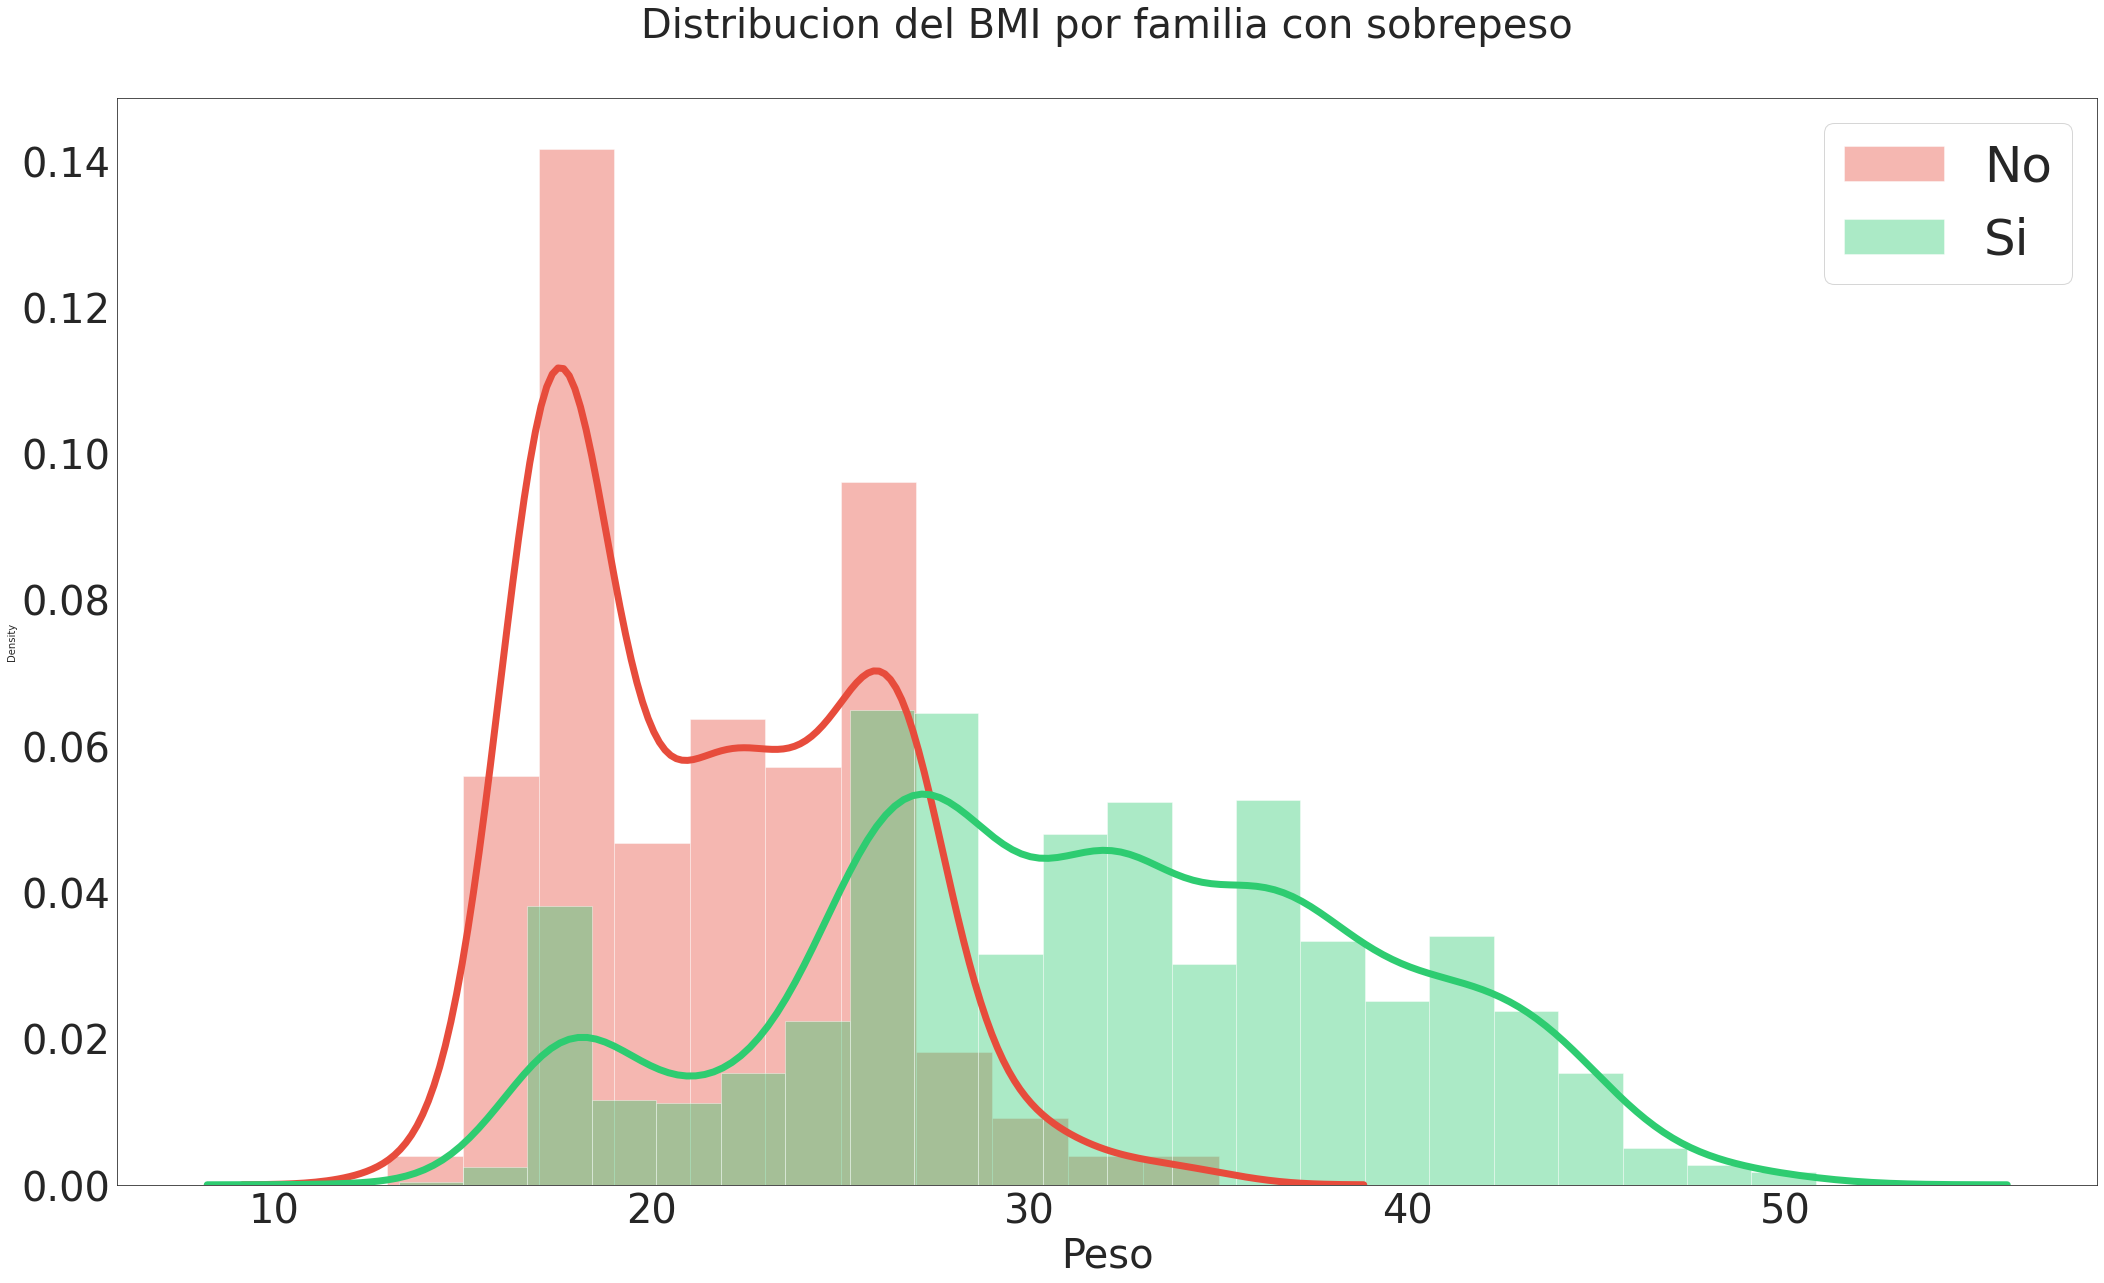

In [ ]:
credit = data['family_history_with_overweight'] == 1
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

# Distribution of feature in dataset
#sns.distplot(dataset["Edad"], label='Distribucion de edad', hist=False, color='#e74c3c', ax=axs)
sns.distplot(data[~credit]["BMI"], label='No', hist=True, color='#e74c3c', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[credit]["BMI"], label='Si', hist=True, color='#2ecc71', ax=axs,kde_kws=dict(linewidth=7))
    
axs.tick_params(axis='x', labelsize=40)
axs.tick_params(axis='y', labelsize=40)
axs.set_xlabel('Peso', fontsize=40)
axs.legend(loc='upper right', prop={'size': 50})
axs.set_title('Distribucion del BMI por {}'.format("familia con sobrepeso"), size=40, y=1.05)
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

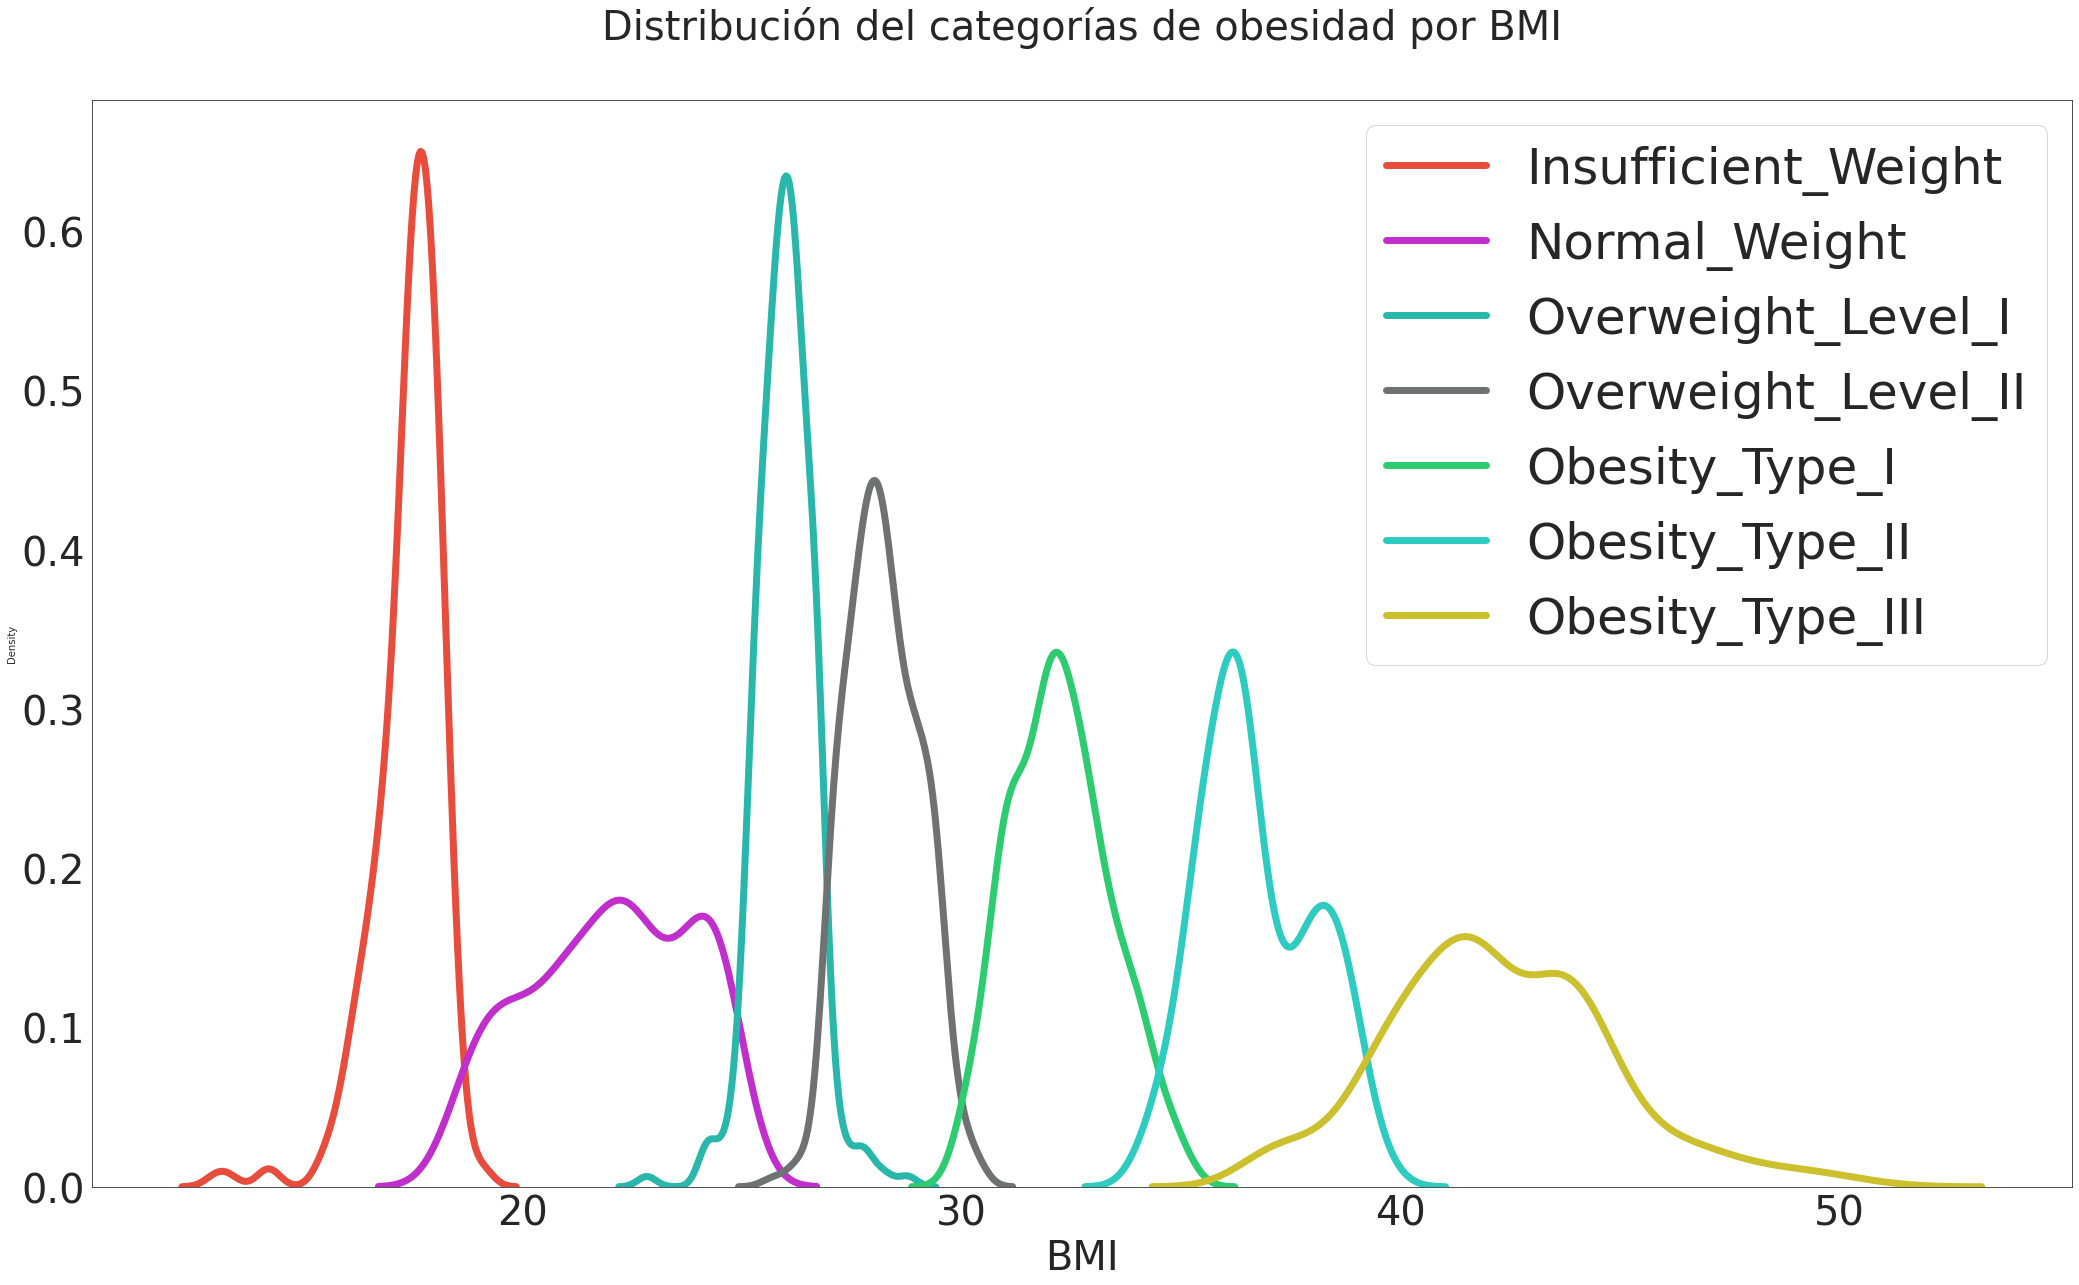

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

# Distribution of feature in dataset
#sns.distplot(dataset["Edad"], label='Distribucion de edad', hist=False, color='#e74c3c', ax=axs)
sns.distplot(data[data["NObeyesdad"]=="Insufficient_Weight"]["BMI"], label='Insufficient_Weight', hist=False, color='#e74c3c', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Normal_Weight"]["BMI"], label='Normal_Weight', hist=False, color='#c02ecc', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Overweight_Level_I"]["BMI"], label='Overweight_Level_I', hist=False, color='#29b7ac', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Overweight_Level_II"]["BMI"], label='Overweight_Level_II', hist=False, color='#6e7272', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_I"]["BMI"], label='Obesity_Type_I', hist=False, color='#2ecc71', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_II"]["BMI"], label='Obesity_Type_II', hist=False, color='#2eccc0', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_III"]["BMI"], label='Obesity_Type_III', hist=False, color='#ccc02e', ax=axs,kde_kws=dict(linewidth=7))
axs.tick_params(axis='x', labelsize=40)
axs.tick_params(axis='y', labelsize=40)
axs.set_xlabel('BMI', fontsize=40)
axs.legend(loc='upper right', prop={'size': 50})
axs.set_title('Distribución del categorías de obesidad por {}'.format("BMI"), size=40, y=1.05)
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

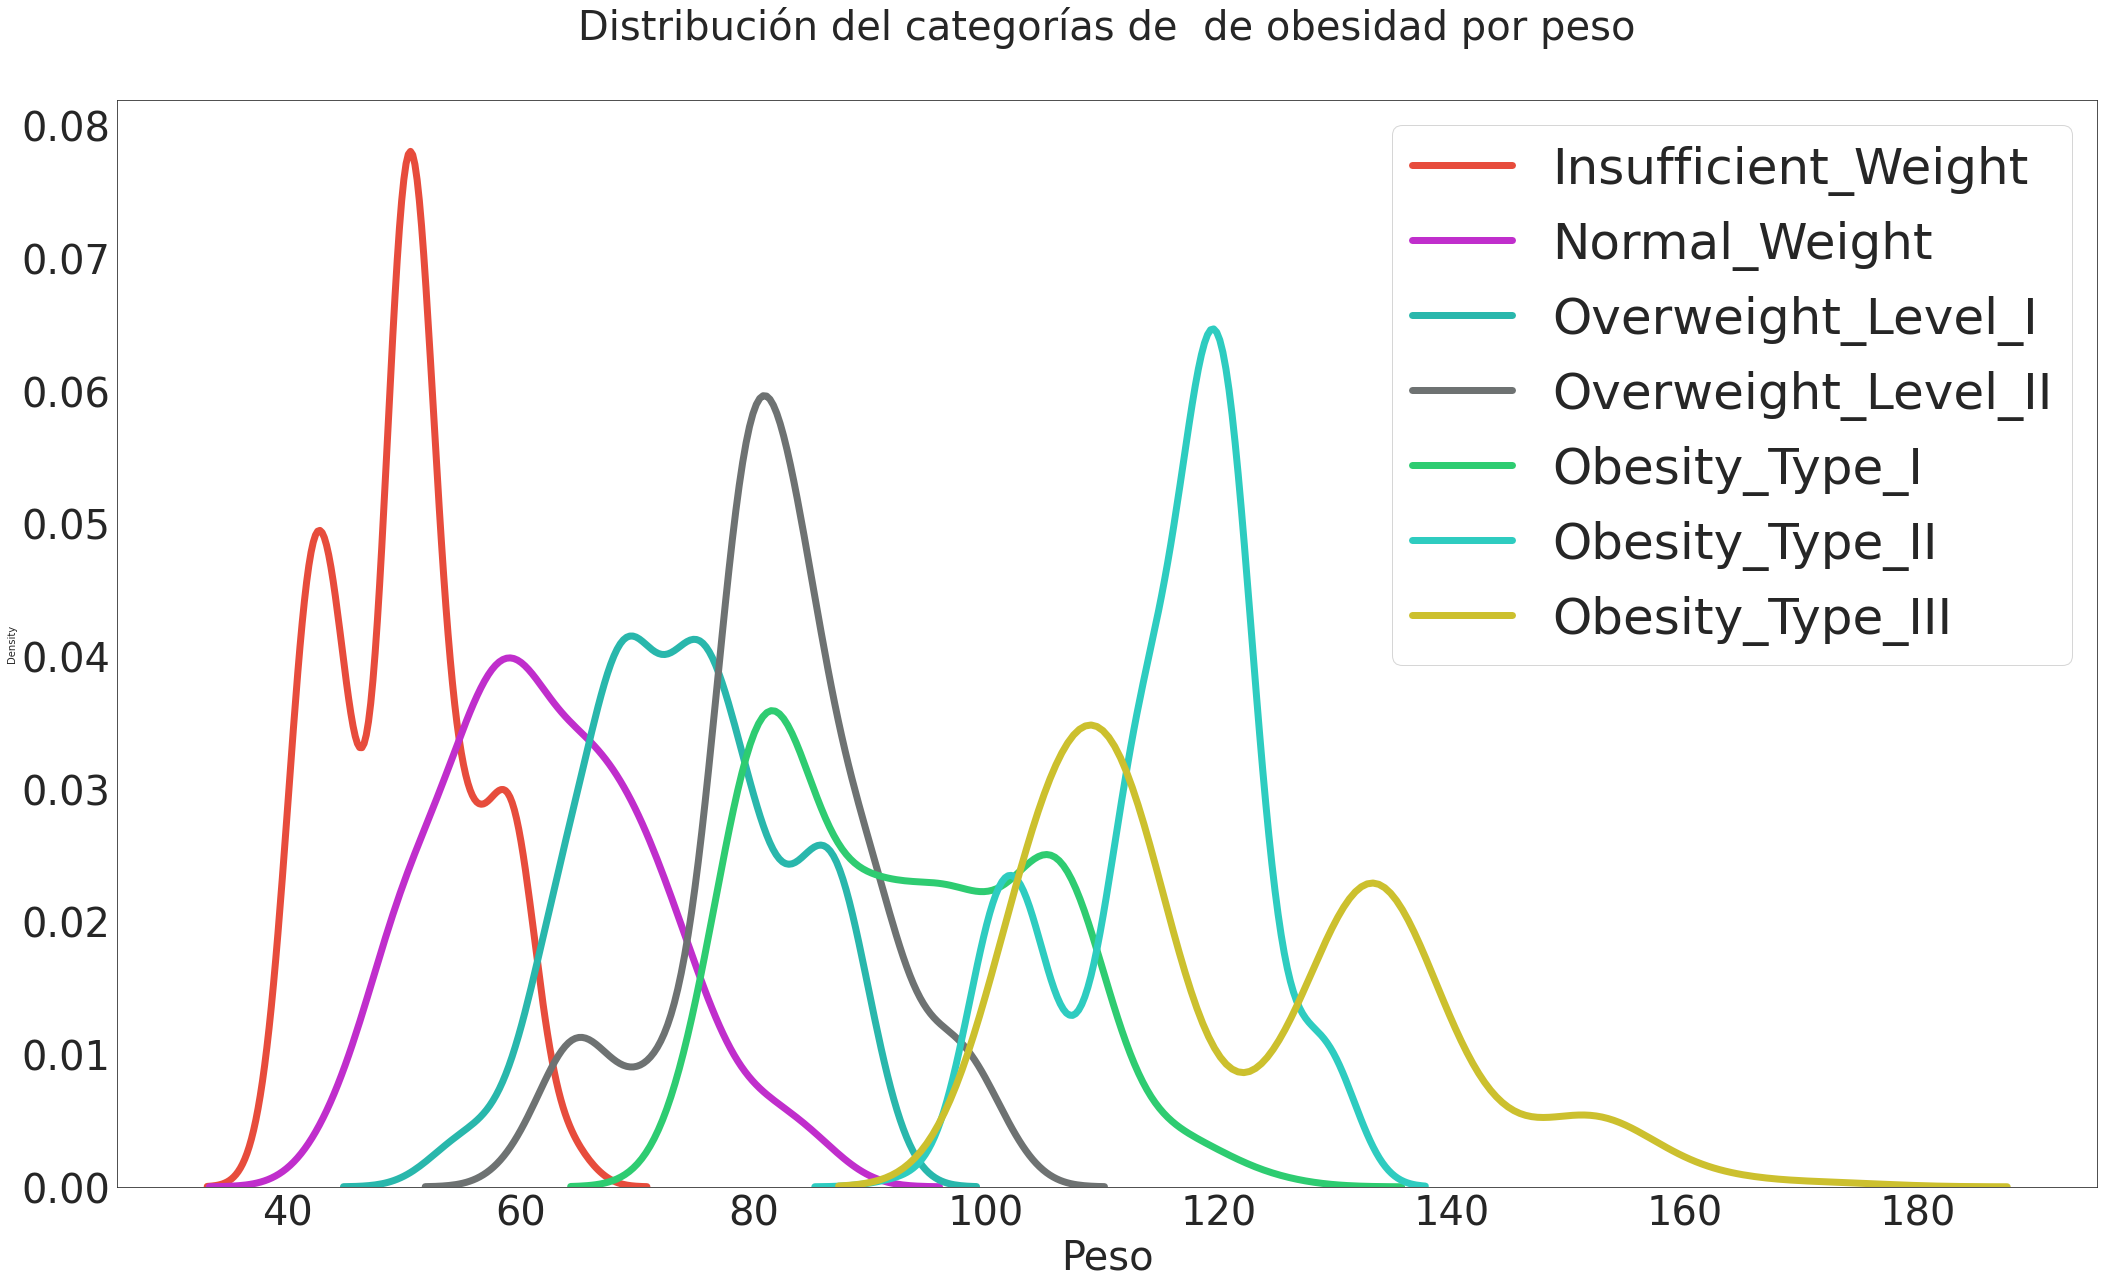

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

# Distribution of feature in dataset
#sns.distplot(dataset["Edad"], label='Distribucion de edad', hist=False, color='#e74c3c', ax=axs)
sns.distplot(data[data["NObeyesdad"]=="Insufficient_Weight"]["Weight"], label='Insufficient_Weight', hist=False, color='#e74c3c', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Normal_Weight"]["Weight"], label='Normal_Weight', hist=False, color='#c02ecc', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Overweight_Level_I"]["Weight"], label='Overweight_Level_I', hist=False, color='#29b7ac', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Overweight_Level_II"]["Weight"], label='Overweight_Level_II', hist=False, color='#6e7272', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_I"]["Weight"], label='Obesity_Type_I', hist=False, color='#2ecc71', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_II"]["Weight"], label='Obesity_Type_II', hist=False, color='#2eccc0', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_III"]["Weight"], label='Obesity_Type_III', hist=False, color='#ccc02e', ax=axs,kde_kws=dict(linewidth=7))

axs.tick_params(axis='x', labelsize=40)
axs.tick_params(axis='y', labelsize=40)
axs.set_xlabel('Peso', fontsize=40)
axs.legend(loc='upper right', prop={'size': 50})
axs.set_title('Distribución del categorías de  de obesidad por {}'.format("peso"), size=40, y=1.05)
axs.grid(False)    
plt.show()

In [ ]:
len(data)

In [ ]:
0.8*len(data)

In [ ]:
0.2*len(data)

In [ ]:
0.15*len(data)

In [ ]:
100/7

#Generar conjunto de datos de entrenamiento y pruebas

In [ ]:
#Separamos la data en variables independientes (x) y dependientes (y) para poder entrenarlas
#En el conjunto de datos x se replican todos las columnas después del procesamiento excluyendo al target ["NObeyesdad","NObeyesdad_num"]
#En el conjunto de datos y solo consideta la columna del target ["NObeyesdad_num"]
x = data.drop(["NObeyesdad","NObeyesdad_num"], axis=1)
y = data["NObeyesdad_num"]

In [ ]:
#Mediante la función "train_test_split" usaremos el 20% de la data para probar el modelo 
#El parámetro "random state" nos sirve para obtener la misma secuencia de "números aleatorios"
#El parámetro "stratify" nos brindará el mismo número de clases en ambos conjuntos de datos 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(f"x Train shape: {x_train.shape}")
print(f"x Test shape: {x_test.shape}")
print(f"y Train shape: {y_train.shape}")
print(f"y Test shape: {y_test.shape}")

x Train shape: (1688, 20)
x Test shape: (423, 20)
y Train shape: (1688,)
y Test shape: (423,)


In [ ]:
#Se muestra la información del conjunto de datos x_train
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 442 to 1329
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1688 non-null   float64
 1   Height                          1688 non-null   float64
 2   Weight                          1688 non-null   float64
 3   family_history_with_overweight  1688 non-null   int64  
 4   FAVC                            1688 non-null   int64  
 5   FCVC                            1688 non-null   float64
 6   NCP                             1688 non-null   float64
 7   CAEC                            1688 non-null   int64  
 8   SMOKE                           1688 non-null   int64  
 9   CH2O                            1688 non-null   float64
 10  SCC                             1688 non-null   int64  
 11  FAF                             1688 non-null   float64
 12  TUE                             

#Configuraciones

In [ ]:
#Función donde se envía el modelo y genera la matriz de confusión basándose en los datos predichos
def plot_confusion_matrix(model):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix","\n")
    index = ["Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"] 
    columns = index
    conf_matrix = pd.DataFrame(cm,columns,index)  
    plt.figure(figsize=(10,6))                     
    sns.heatmap(conf_matrix, annot = True)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    print("\n")   

In [ ]:
#Función que construye un reporte mostrando las principales métricas de classificación como precision y recall
def get_test_report(model):
    test_pred = model.predict(x_test)
    return(classification_report(y_test, test_pred))

In [ ]:
#Función que muestra características que más aportan al modelo en orden de importancia
def get_features(model):
  importances = pd.DataFrame({"columns":x_train.columns, "importances":model.feature_importances_}).sort_values("importances", ascending=False)
  return(importances.style.bar())

#Construir los modelos

##Modelo Ramdon Forest


In [ ]:
#Entrenamos el modelo "RandomForestClassifier" usando la función "GridSearchCV" para considerar la mejor combinación de los hiperparámetros
rf= RandomForestClassifier(random_state=1)

#Se asignan los hiperparámetros a evaluar
pg_rf={'criterion': ['gini', 'entropy'],'max_depth': [18, 20, 22], 'n_estimators': [2000,2600,2800], 
       'oob_score': [True, False], 'max_features':['sqrt', 'auto'], }

#Se configura el "GridSearchCV"
gs_rf= GridSearchCV (estimator= rf,
                    param_grid= pg_rf,
                    scoring='f1_macro',
                    cv=2)

#Se hace validación cruzada anidada combinando en el grid search (bucle interno) y k-fold cv (bucle externo)
gs_rf_scores = cross_val_score(gs_rf, X=x_train, y=y_train, cv=3, scoring='f1_macro', verbose = 10, n_jobs=-1)

#Se entrena el "GridSearchCV" en los conjuntos de datos de entrenamiento
gs_rf.fit(x_train, y_train)

#Se muestran los resultados obtenidos después de realizado la búsqueda de parámetros
print('Train Accuracy:   {0:.1f}%'.format(gs_rf.score(x_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_rf_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_rf.score(x_test, y_test)*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 39.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 39.9min finished


Train Accuracy:   100.0%
CV Mean Accuracy: 98.7%
Test Accuracy:    99.0%


In [ ]:
#Se muestra los mejores parámetros obtenidos por el "GridSearchCV"
gs_rf_best=gs_rf.best_estimator_
print(gs_rf_best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=18, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2600,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)


In [ ]:
#Reporte de la búsqueda de las configuraciones del modelo
gs_rf.best_estimator_
#Imprime la mejor configuración obtenida 
print("Best: %f using %s" % (gs_rf.best_score_, gs_rf.best_params_))
#Imprime todas las configuraciones ejecutadas
means = gs_rf.cv_results_['mean_test_score']
stds = gs_rf.cv_results_['std_test_score']
params = gs_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.985328 using {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'n_estimators': 2600, 'oob_score': True}
0.983480 (0.000788) with: {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'n_estimators': 2000, 'oob_score': True}
0.983480 (0.000788) with: {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'n_estimators': 2000, 'oob_score': False}
0.982922 (0.001346) with: {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'n_estimators': 2600, 'oob_score': True}
0.982922 (0.001346) with: {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'n_estimators': 2600, 'oob_score': False}
0.982922 (0.001346) with: {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'n_estimators': 2800, 'oob_score': True}
0.982922 (0.001346) with: {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'n_estimators': 2800, 'oob_score': False}
0.983480 (0.000788) with: {'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 

In [ ]:
#Reporte con las principales métricas de classificación de los datos predichos generados por el modelo
print(get_test_report(gs_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.98      1.00      0.99        58
           2       0.98      1.00      0.99        58
           3       1.00      0.98      0.99        58
           4       1.00      1.00      1.00        70
           5       0.98      0.98      0.98        60
           6       0.98      0.98      0.98        65

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423



Confusion Matrix 



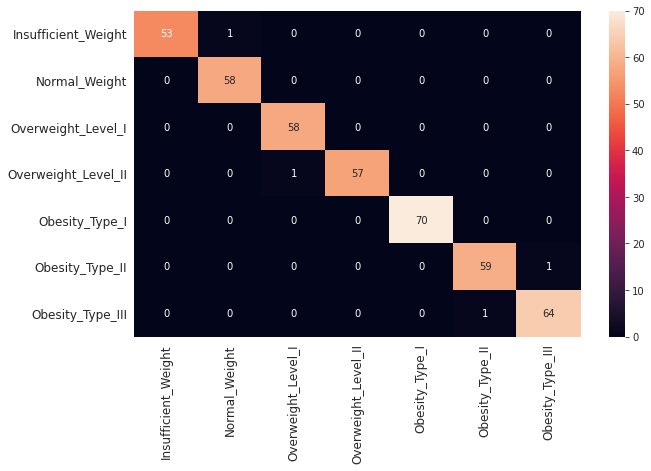

In [ ]:
# Reporte de la matriz de confusión de los datos predichos generados por el modelo
plot_confusion_matrix(gs_rf)

In [ ]:
# Reporte de las características que más aportan al modelo
get_features(gs_rf_best)

,columns,importances
19,BMI,0.392380
2,Weight,0.218006
5,FCVC,0.067044
18,Gender_Male,0.053785
0,Age,0.051264
1,Height,0.043645
6,NCP,0.028817
3,family_history_with_overweight,0.023199
12,TUE,0.022179
7,CAEC,0.020098
